# 1. Install Dependencies and Setup

In [11]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.8 kB ? eta -:--:--
     -------------- ---------------------- 61.4/160.8 kB 812.7 kB/s eta 0:00:01
     ------------------------------------ - 153.6/160.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 3.2 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.6 MB 2.8 MB/s eta 0:00:03
   - -------------------------------------- 0.4/7.6 MB 3.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.6 MB 2.9 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 3.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 3.2 MB/s eta 0:00:03
   ----- ---

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

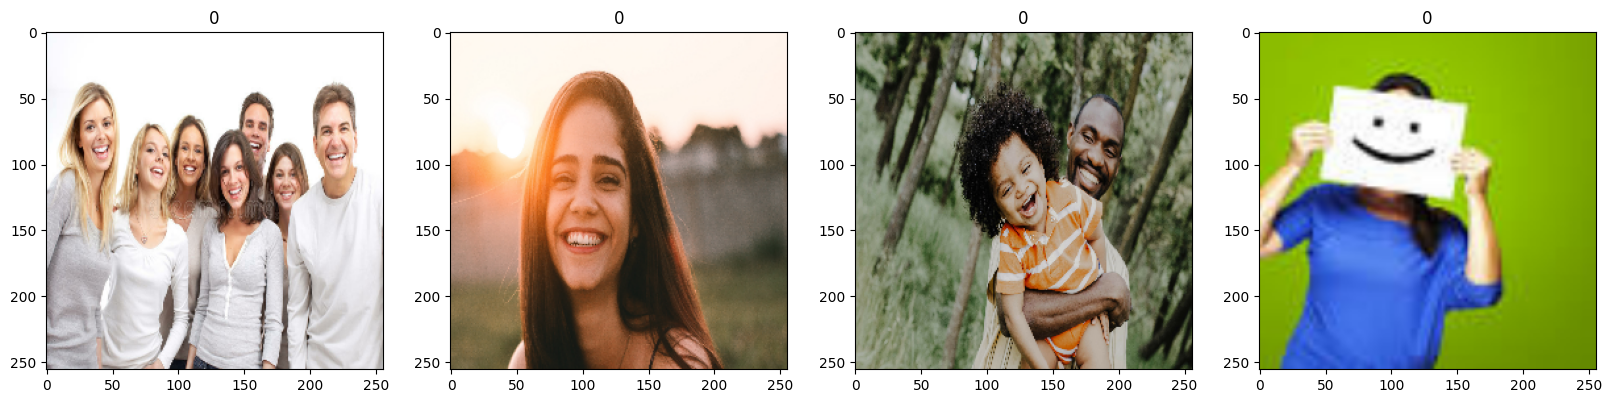

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[8.03921580e-01, 8.43137264e-01, 8.11764717e-01],
          [8.03921580e-01, 8.43137264e-01, 8.11764717e-01],
          [8.05606604e-01, 8.44822288e-01, 8.13449740e-01],
          ...,
          [9.25490201e-01, 9.49019611e-01, 9.49019611e-01],
          [9.25490201e-01, 9.49019611e-01, 9.49019611e-01],
          [9.25490201e-01, 9.49019611e-01, 9.49019611e-01]],
 
         [[8.03921580e-01, 8.43137264e-01, 8.11764717e-01],
          [8.03921580e-01, 8.43137264e-01, 8.11764717e-01],
          [8.05606604e-01, 8.44822288e-01, 8.13449740e-01],
          ...,
          [9.25490201e-01, 9.49019611e-01, 9.49019611e-01],
          [9.25490201e-01, 9.49019611e-01, 9.49019611e-01],
          [9.25490201e-01, 9.49019611e-01, 9.49019611e-01]],
 
         [[8.03921580e-01, 8.43137264e-01, 8.11764717e-01],
          [8.03921580e-01, 8.43137264e-01, 8.11764717e-01],
          [8.05606604e-01, 8.44822288e-01, 8.13449740e-01],
          ...,
          [9.25490201e-01, 9.49019611e-01, 9.4901

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 262ms/step - loss: 1.1643 - accuracy: 0.5134 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 3s 240ms/step - loss: 0.6788 - accuracy: 0.5223 - val_loss: 0.6562 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 2s 236ms/step - loss: 0.6772 - accuracy: 0.5938 - val_loss: 0.6074 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 3s 238ms/step - loss: 0.5634 - accuracy: 0.7768 - val_loss: 0.4787 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 3s 246ms/step - loss: 0.5433 - accuracy: 0.7455 - val_loss: 0.6643 - val_accuracy: 0.6094
Epoch 6/20
7/7 [==============================] - 3s 242ms/step - loss: 0.5048 - accuracy: 0.8036 - val_loss: 0.5210 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 2s 227ms/step - loss: 0.4731 - accuracy: 0.8125 - val_loss: 0.3774 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===

# 8. Plot Performance

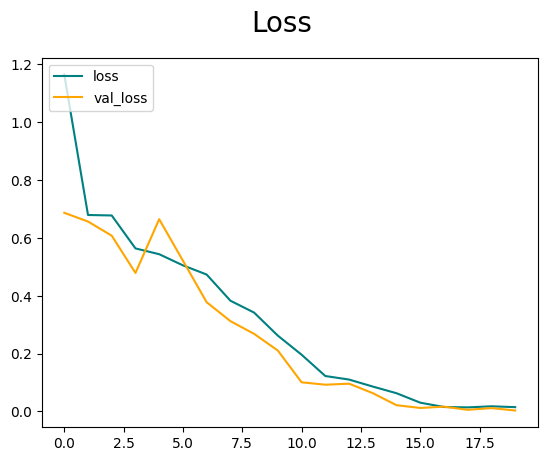

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

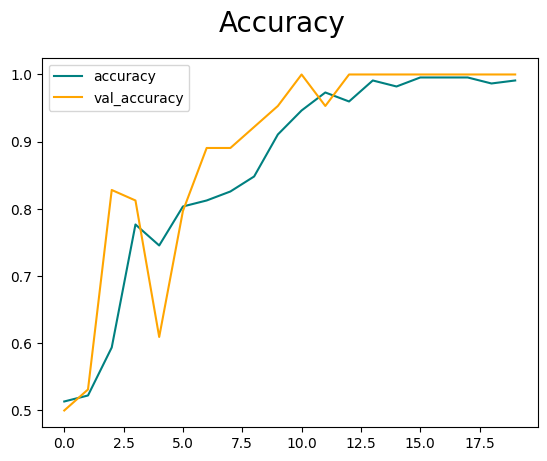

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 486ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [37]:
import cv2

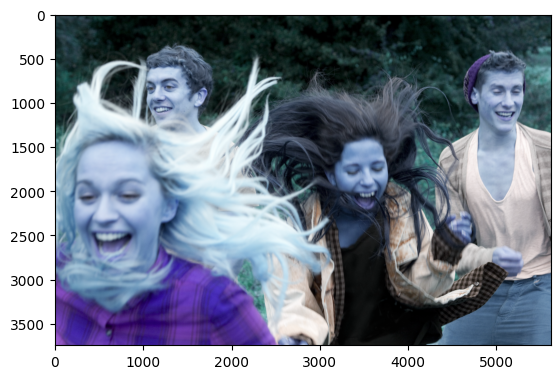

In [43]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

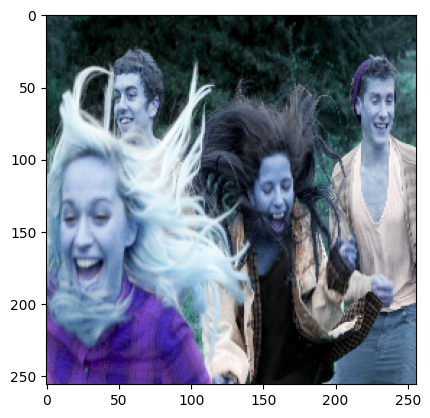

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [46]:
yhat

array([[0.00785086]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))